In [8]:
# 다 필요한 것들임
# scikit - learn 기반 회기 모델 분석
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 연습 데이터 가져오기(MS-Azure 기계학습 데이터 사용)
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
bike_data = pd.read_csv('daily-bike-share.csv')
bike_data['day'] = pd.DatetimeIndex(bike_data['dteday']).day
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit', 'day']
bike_data[numeric_features + ['rentals']].describe()
print(bike_data.head())


# 특징들을 다 나눠서 표기
# 이후에 넘파이 배열을 x축은 특징, y축은 라벨로 표기함
X, y = bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values, bike_data['rentals'].values

# 70% 학습 30% 테스트
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

--2022-12-02 12:04:38--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48800 (48K) [text/plain]
Saving to: ‘daily-bike-share.csv.2’

daily-bike-share.cs 100%[===================>]  47.66K  --.-KB/s    in 0.007s  

2022-12-02 12:04:38 (6.75 MB/s) - ‘daily-bike-share.csv.2’ saved [48800/48800]

   instant    dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  1/1/2011       1   0     1        0        6           0   
1        2  1/2/2011       1   0     1        0        0           0   
2        3  1/3/2011       1   0     1        0        1           1   
3        4  1/4/2011       1   0     1        0       

Lasso() 

MSE: 201155.70593338404
RMSE: 448.5038527519959
R2: 0.6056468637824488


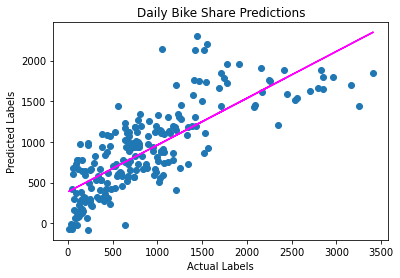

In [9]:
from sklearn.linear_model import Lasso

# 라쏘모델 (lasso model)추가 - 평균 제곱 오차가 최소가 되도록 하는 가중치와 편향성을 찾음.
# 즉, 모든 가중치가 0으로 감....
model = Lasso().fit(X_train, y_train)
print (model, "\n")

# 테스트 데이터 이용하여 학습 검정
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# 그래프표현
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# 선형 회기 확인
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

# 학습
model = DecisionTreeRegressor().fit(X_train, y_train)
print (model, "\n")

# 학습 모델 트리형식으로 표기
tree = export_text(model)
print(tree)

DecisionTreeRegressor() 

|--- feature_6 <= 0.45
|   |--- feature_4 <= 0.50
|   |   |--- feature_7 <= 0.32
|   |   |   |--- feature_8 <= 0.41
|   |   |   |   |--- feature_1 <= 2.50
|   |   |   |   |   |--- feature_9 <= 0.33
|   |   |   |   |   |   |--- feature_1 <= 1.50
|   |   |   |   |   |   |   |--- value: [558.00]
|   |   |   |   |   |   |--- feature_1 >  1.50
|   |   |   |   |   |   |   |--- value: [515.00]
|   |   |   |   |   |--- feature_9 >  0.33
|   |   |   |   |   |   |--- value: [317.00]
|   |   |   |   |--- feature_1 >  2.50
|   |   |   |   |   |--- feature_9 <= 0.28
|   |   |   |   |   |   |--- feature_0 <= 1.50
|   |   |   |   |   |   |   |--- value: [968.00]
|   |   |   |   |   |   |--- feature_0 >  1.50
|   |   |   |   |   |   |   |--- value: [981.00]
|   |   |   |   |   |--- feature_9 >  0.28
|   |   |   |   |   |   |--- feature_6 <= 0.30
|   |   |   |   |   |   |   |--- value: [532.00]
|   |   |   |   |   |   |--- feature_6 >  0.30
|   |   |   |   |   |   |   |--- val

MSE: 264277.5909090909
RMSE: 514.0793624617612
R2: 0.4819003700470089


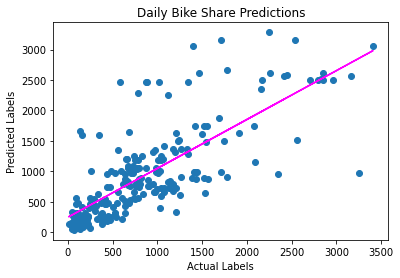

In [12]:
# 테스트 데이터 이용하여 학습 검정
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# 그래프표현
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# 선형 회기 확인
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

RandomForestRegressor() 

MSE: 114735.50859409093
RMSE: 338.72630336909316
R2: 0.7750682366197478


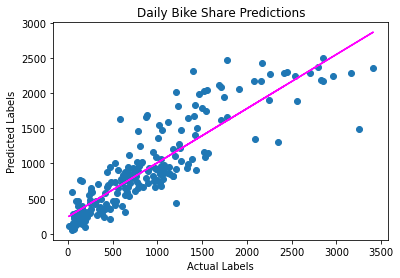

In [13]:
from sklearn.ensemble import RandomForestRegressor

# 학습
model = RandomForestRegressor().fit(X_train, y_train)
print (model, "\n")

# 테스트 데이터 이용하여 학습 검정
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# 그래프표현
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# 선형 회기 확인
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

GradientBoostingRegressor() 

MSE: 104110.7248441694
RMSE: 322.6619358464357
R2: 0.7958974583113382


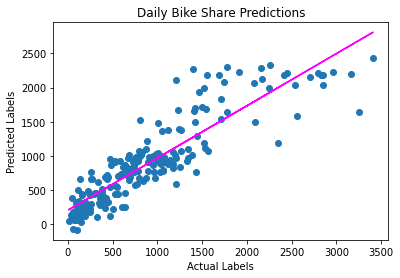

In [7]:
# 학습하기
from sklearn.ensemble import GradientBoostingRegressor

# 라쏘모델을 학습 데이터에 추가하기
model = GradientBoostingRegressor().fit(X_train, y_train)
print (model, "\n")

# 테스트 데이터 이용하여 학습 검정
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# 그래프표현
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# 선형 회기 확인
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [ ]:
# 점점 그래프 내의 점이 학습을 진행할 수록 직선으로 모이는 것을 알 수 있다.
# 단순 선형 회기 모델에 대해 알 수 있음.
# 결정 트리 모델 학습법을 통해 관측값과 목표값을 알 수 있음.
# 기존의 선형 회기 모델에서 lasso알고리즘을 추가함으로써, 평균제곱오차의 최소를 추가하도록 하는 제약 조건을 걸어줌.
# 이를 통해, 모델에서 가장 중요한 특징들을 가지고옴으로써, 모델에 대한 해석력이 비약적으로 증가함.